# Regular Rolling 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}

In [ ]:
df = pd.DataFrame(product)
df.head()

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


In [ ]:
# df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

In [ ]:
df['SMA_3'] = df.demand.rolling(window=3).mean()  # 三个为一个window
df['SMA_4'] = df.iloc[:,1].rolling(window=4).mean()
df['CUM_3'] = df.iloc[:,1].rolling(window=4).sum()
df.head()

,month,demand,pandas_SMA_3,pandas_SMA_4,SMA_3,SMA_4,CUM_3
0,1,290,NaN,NaN,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN,NaN,NaN
2,3,288,279.333333,NaN,279.333333,NaN,NaN
3,4,300,282.666667,284.5,282.666667,284.5,1138.0
4,5,310,299.333333,289.5,299.333333,289.5,1158.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

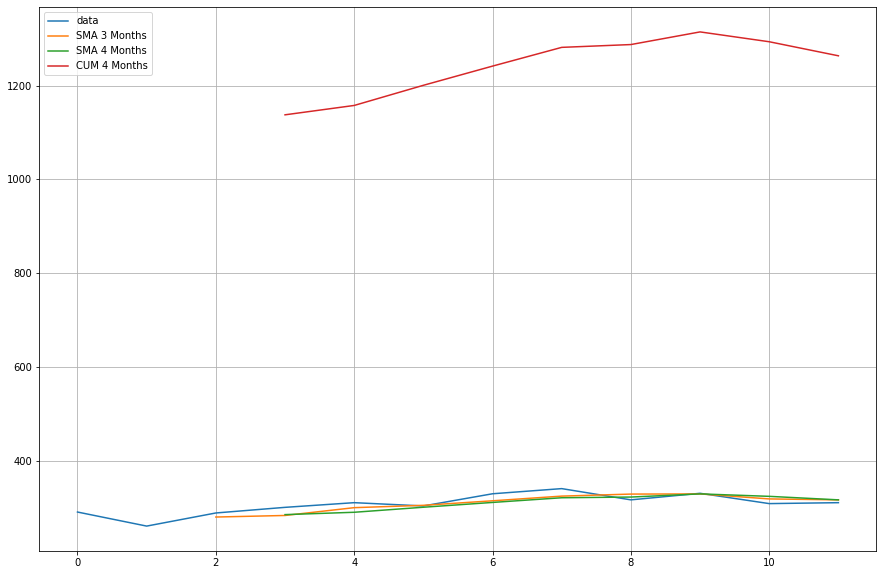

In [ ]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['demand'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.plot(df['CUM_3'],label='CUM 4 Months')
plt.legend(loc=2)

# Group By Rolling

In [ ]:
id = ['a', 'a', 'b', 'a', 'b', 'a', 'b']
x = range(0, len(id))
df = pd.DataFrame(zip(id, x), columns = ['id', 'x'])

df

,id,x
0,a,0
1,a,1
2,b,2
3,a,3
4,b,4
5,a,5
6,b,6


In [ ]:
#df.groupby('id')[['x']].rolling(2, min_periods=1).sum()
df.groupby('id')[['x']].rolling(3, min_periods=1).sum()

x
id        
a  0   0.0
   1   1.0
   3   4.0
   5   9.0
b  2   2.0
   4   6.0
   6  12.0

In [ ]:
df.groupby('id')[['x']].rolling(2).mean().reset_index(0,drop=True)

,x
0,NaN
1,0.5
3,2.0
5,4.0
2,NaN
4,3.0
6,5.0


In [ ]:
df.groupby('id')[['x']].transform(lambda s: s.rolling(2, min_periods=1).sum())

,x
0,0.0
1,1.0
2,2.0
3,4.0
4,6.0
5,8.0
6,10.0


# Fill index gap

其实是使用`reindex`替代原有index, 然后中间fill值可以自取

## 日期类

In [ ]:
import pandas as pd

new_idx = pd.date_range('09-02-2013', '09-07-2013')   

s = pd.Series({'09-02-2013': 2,     # 需要fill 09-02到09-07之间的gap，中间不存在的date的value用0表示
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})

s

09-02-2013     2
09-03-2013    10
09-06-2013     5
09-07-2013     1
dtype: int64

In [ ]:
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(new_idx, fill_value=0)

s

2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
Freq: D, dtype: int64

## 随便什么类

In [ ]:
import pandas as pd

new_idx = range(2, 8)   

s = pd.Series({2: 2,     # 需要fill 09-02到09-07之间的gap，中间不存在的date的value用0表示
               3: 10,
               6: 5,
               7: 1})

In [ ]:
s.index

Int64Index([2, 3, 6, 7], dtype='int64')

In [ ]:
s.index = pd.Index(s.index)

s = s.reindex(new_idx, fill_value=0)

s

2     2
3    10
4     0
5     0
6     5
7     1
dtype: int64

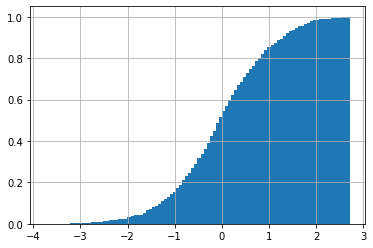

In [ ]:
import matplotlib.pyplot as plt

ser = pd.Series(np.random.normal(size=1000))

ser.hist(cumulative=True, density=1, bins=100)


plt.show()

In [ ]:
# Define your series
s = pd.Series([9, 5, 3, 5, 5, 4, 6, 5, 5, 8, 7, 3,1,2,4,6,8,9], name = 'value')
df = pd.DataFrame(s)
df

,value
0,9
1,5
2,3
3,5
4,5
5,4
6,6
7,5
8,5
9,8


In [ ]:
# Get the frequency, PDF and CDF for each value in the series

# Frequency
stats_df = df \
            .groupby('value') \
            ['value'] \
            .agg('count') \
            .pipe(pd.DataFrame) \
            .rename(columns = {'value': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

,value,frequency,pdf,cdf
0,1,1,0.055556,0.055556
1,2,1,0.055556,0.111111
2,3,2,0.111111,0.222222
3,4,2,0.111111,0.333333
4,5,5,0.277778,0.611111
5,6,2,0.111111,0.722222
6,7,1,0.055556,0.777778
7,8,2,0.111111,0.888889
8,9,2,0.111111,1.000000


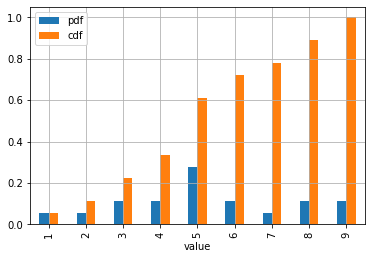

In [ ]:
# Plot the discrete Probability Mass Function and CDF.
# Technically, the 'pdf label in the legend and the table the should be 'pmf'
# (Probability Mass Function) since the distribution is discrete.

# If you don't have too many values / usually discrete case
stats_df.plot.bar(x = 'value', y = ['pdf', 'cdf'], grid = True)